In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load the dataset
df = pd.read_csv('final_data.csv')

# Menghapus baris yang memiliki nilai yang hilang
df.dropna(inplace=True)
df

,CO,CO2,Kategori
0,348,105,Berbahaya
1,143,147,Tidak Sehat
2,113,28,Tidak Sehat
3,276,342,Berbahaya
4,360,117,Berbahaya
...,...,...,...
99995,190,356,Berbahaya
99996,261,34,Sangat Tidak Sehat
99997,434,57,Berbahaya
99998,283,223,Sangat Tidak Sehat


In [ ]:
# Mapping kategori ke nilai numerik
category_mapping = {
    'Berbahaya': 0,
    'Sangat Tidak Sehat': 1,
    'Tidak Sehat': 2,
    'Sedang': 3,
    'Baik': 4
}
df['Kategori'] = df['Kategori'].map(category_mapping)
df

,CO,CO2,Kategori
0,348,105,0
1,143,147,2
2,113,28,2
3,276,342,0
4,360,117,0
...,...,...,...
99995,190,356,0
99996,261,34,1
99997,434,57,0
99998,283,223,1


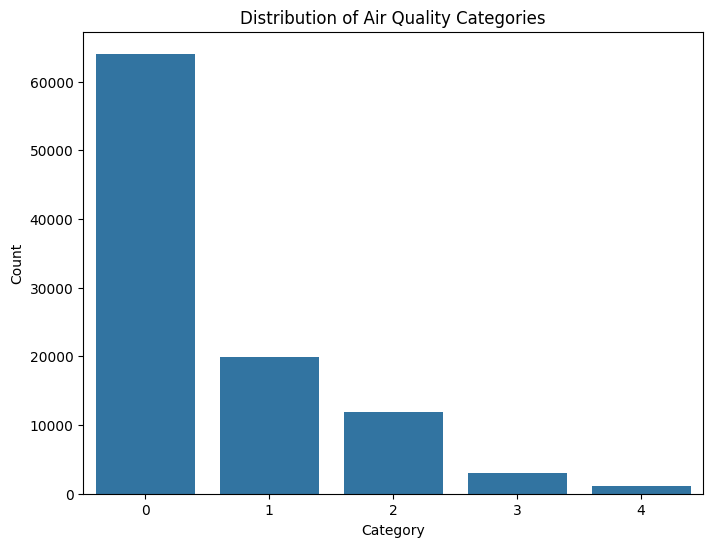

In [ ]:
# Histogram Kategori Target
plt.figure(figsize=(8, 6))
sns.countplot(x='Kategori', data=df)
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split fitur dan variabel target
X = df.drop(columns=['Kategori']).values
y = df['Kategori'].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
class PrintEpochProgress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}/{self.params["epochs"]}, Loss: {logs["loss"]:.6f}, Accuracy: {logs["accuracy"]:.6f}, Val Loss: {logs["val_loss"]:.6f}, Val Accuracy: {logs["val_accuracy"]:.6f}')


In [ ]:
# Model Bayesian Fuzzy Classification menggunakan TensorFlow
model_bayesian_fuzzy = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Dense(5, activation='sigmoid')  # menggunakan aktivasi sigmoid untuk representasi probabilitas
])

model_bayesian_fuzzy.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Pelatihan Bayesian Fuzzy Classification
history_bayesian_fuzzy = model_bayesian_fuzzy.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0,callbacks=[PrintEpochProgress()])

# Evaluasi model pada data pengujian
bayesian_fuzzy_pred_prob = model_bayesian_fuzzy.predict(X_test)
bayesian_fuzzy_pred = np.argmax(bayesian_fuzzy_pred_prob, axis=1)
bayesian_fuzzy_accuracy = accuracy_score(y_test, bayesian_fuzzy_pred)

print("\nBayesian Fuzzy Classification Accuracy on Test Data:", bayesian_fuzzy_accuracy)
print("\nClassification Report for Bayesian Fuzzy Classification:")
print(classification_report(y_test, bayesian_fuzzy_pred,zero_division=1))

Epoch 1/50, Loss: 1.033519, Accuracy: 0.616313, Val Loss: 0.683064, Val Accuracy: 0.769625
Epoch 2/50, Loss: 0.620483, Accuracy: 0.780484, Val Loss: 0.580926, Val Accuracy: 0.782687
Epoch 3/50, Loss: 0.558578, Accuracy: 0.785594, Val Loss: 0.540215, Val Accuracy: 0.782500
Epoch 4/50, Loss: 0.527946, Accuracy: 0.788109, Val Loss: 0.517112, Val Accuracy: 0.783437
Epoch 5/50, Loss: 0.509126, Accuracy: 0.788625, Val Loss: 0.501724, Val Accuracy: 0.783625
Epoch 6/50, Loss: 0.496237, Accuracy: 0.789234, Val Loss: 0.490847, Val Accuracy: 0.783188
Epoch 7/50, Loss: 0.486755, Accuracy: 0.789437, Val Loss: 0.482699, Val Accuracy: 0.783188
Epoch 8/50, Loss: 0.479373, Accuracy: 0.789547, Val Loss: 0.475956, Val Accuracy: 0.783750
Epoch 9/50, Loss: 0.473346, Accuracy: 0.789922, Val Loss: 0.470928, Val Accuracy: 0.782625
Epoch 10/50, Loss: 0.468327, Accuracy: 0.789844, Val Loss: 0.466241, Val Accuracy: 0.783125
Epoch 11/50, Loss: 0.464160, Accuracy: 0.789453, Val Loss: 0.462408, Val Accuracy: 0.7822

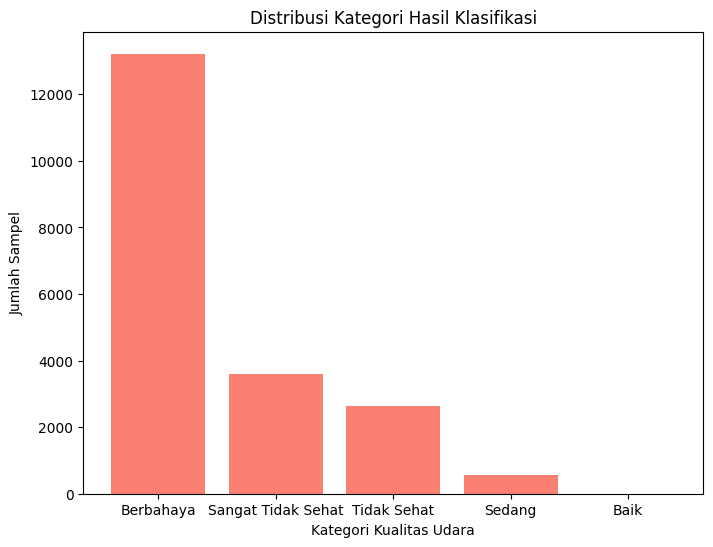

In [ ]:
# Mendefinisikan label untuk kategori sesuai dengan jumlah kategori dalam model
labels = ['Berbahaya', 'Sangat Tidak Sehat', 'Tidak Sehat', 'Sedang', 'Baik']

# Memperoleh prediksi kategori dari model Bayesian Fuzzy Classification
bayesian_fuzzy_pred_category = np.argmax(bayesian_fuzzy_pred_prob, axis=1)

# Menghitung jumlah sampel yang diklasifikasikan ke setiap kategori
bayesian_fuzzy_class_counts = np.bincount(bayesian_fuzzy_pred_category, minlength=len(labels))

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(labels, bayesian_fuzzy_class_counts, color='salmon')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kategori Hasil Klasifikasi')
plt.show()

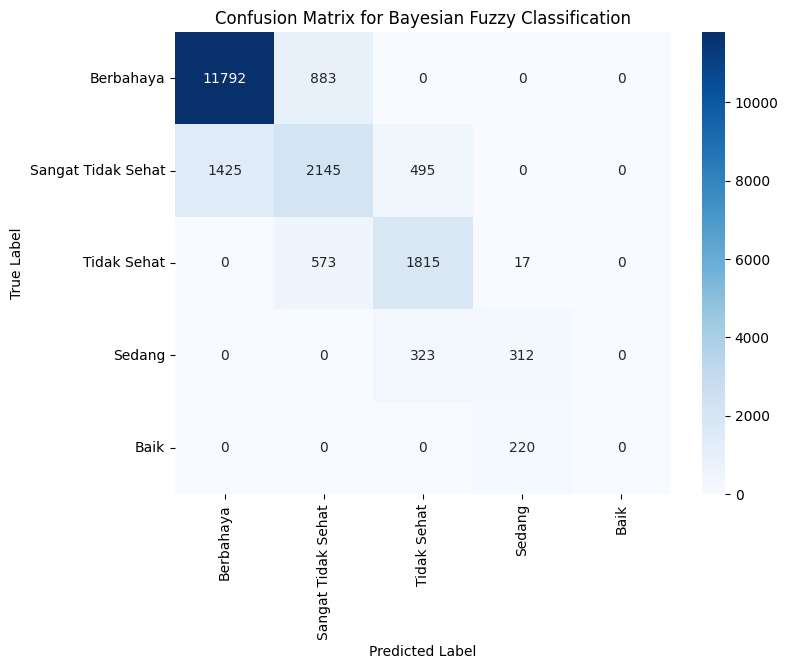

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Mendapatkan prediksi dari model Bayesian Fuzzy Classification pada data pengujian
bayesian_fuzzy_pred = np.argmax(bayesian_fuzzy_pred_prob, axis=1)

# Membuat matriks kebingungan (confusion matrix)
conf_matrix = confusion_matrix(y_test, bayesian_fuzzy_pred)

# Visualisasi matriks kebingungan sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys())
plt.title('Confusion Matrix for Bayesian Fuzzy Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

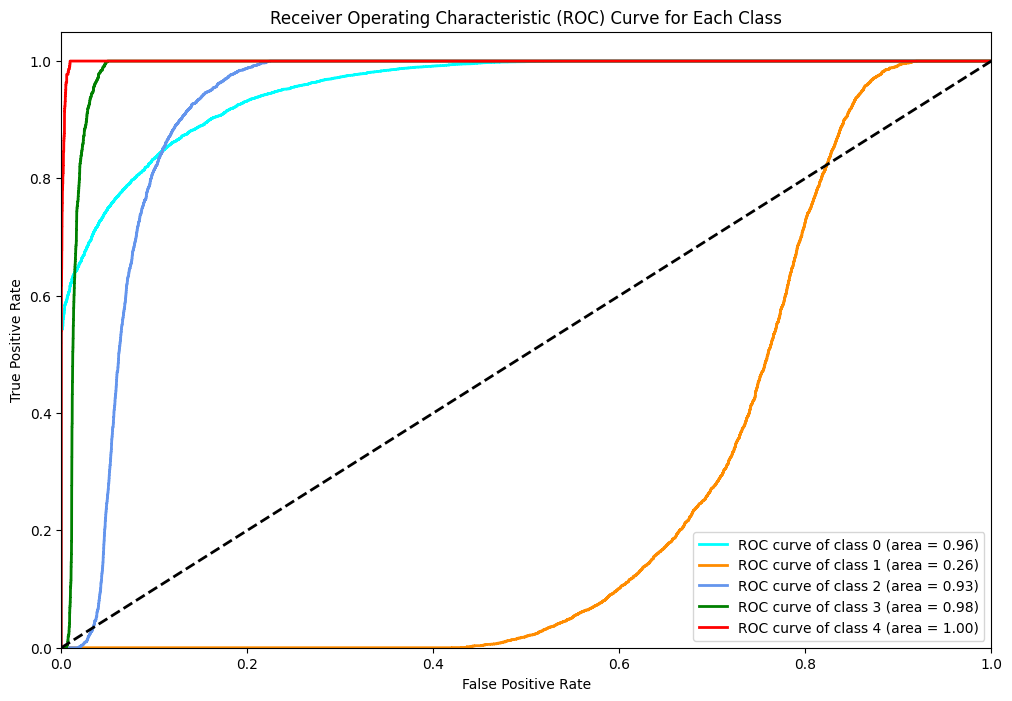

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisasi label untuk klasifikasi multikelas one-vs-rest
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Menghitung ROC curve dan ROC area untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], bayesian_fuzzy_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot semua ROC curves
plt.figure(figsize=(12, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


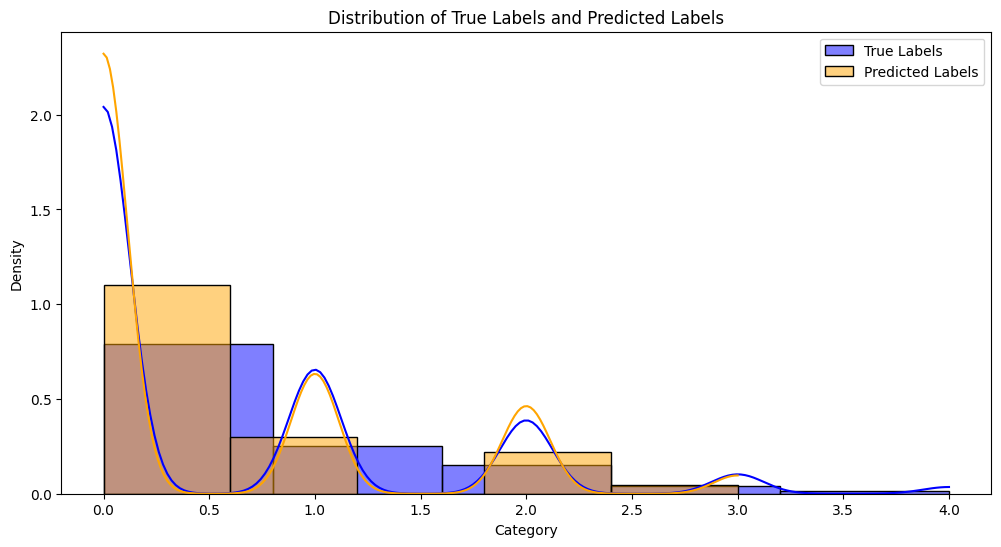

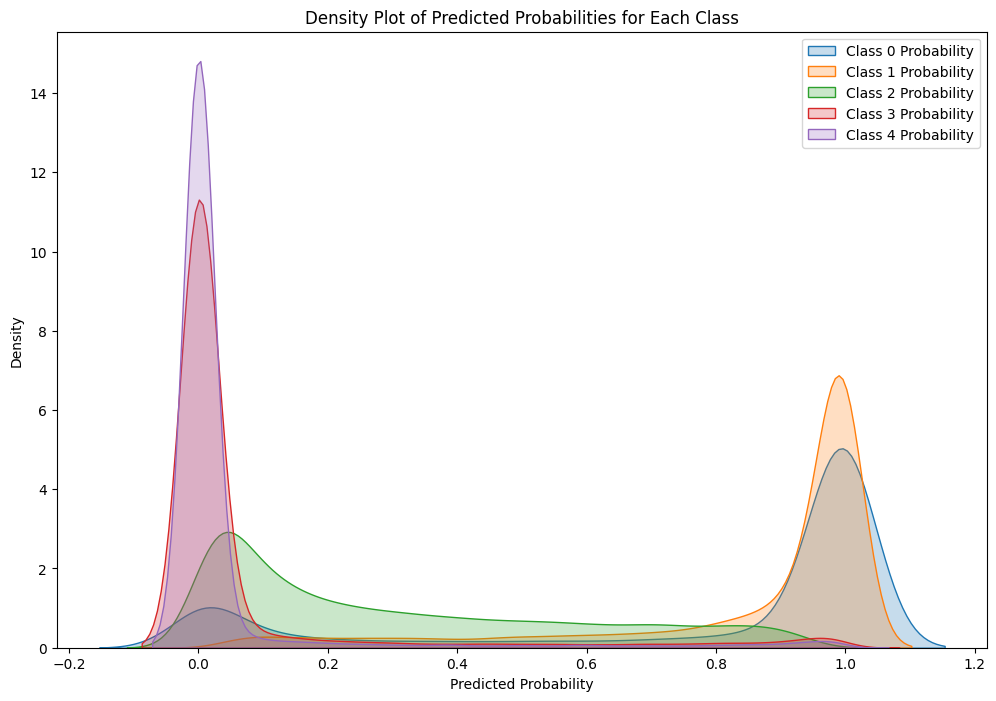

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi dari prediksi dan label asli

# Histogram untuk label asli
plt.figure(figsize=(12, 6))
sns.histplot(y_test, bins=5, kde=True, color='blue', label='True Labels', stat="density", common_norm=False)
sns.histplot(bayesian_fuzzy_pred, bins=5, kde=True, color='orange', label='Predicted Labels', stat="density", common_norm=False)
plt.title('Distribution of True Labels and Predicted Labels')
plt.xlabel('Category')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot Distribusi Probabilitas Prediksi untuk setiap Kelas
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    sns.kdeplot(bayesian_fuzzy_pred_prob[:, i], fill=True, label=f'Class {i} Probability')
plt.title('Density Plot of Predicted Probabilities for Each Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()


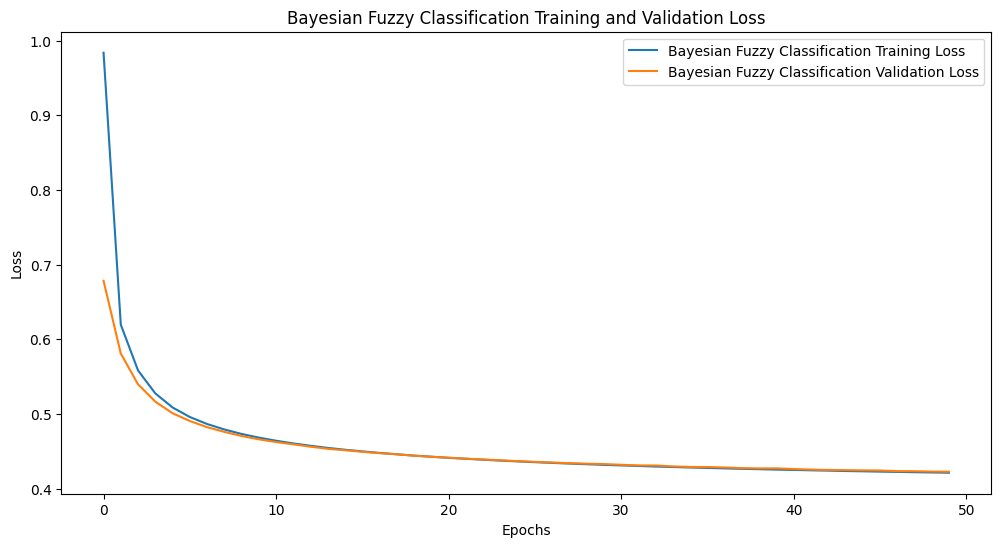

In [ ]:
# Grafik Garis Loss dan Akurasi untuk Model Bayesian Fuzzy Classification
plt.figure(figsize=(12, 6))
plt.plot(history_bayesian_fuzzy.history['loss'], label='Bayesian Fuzzy Classification Training Loss')
plt.plot(history_bayesian_fuzzy.history['val_loss'], label='Bayesian Fuzzy Classification Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Bayesian Fuzzy Classification Training and Validation Loss')
plt.legend()
plt.show()


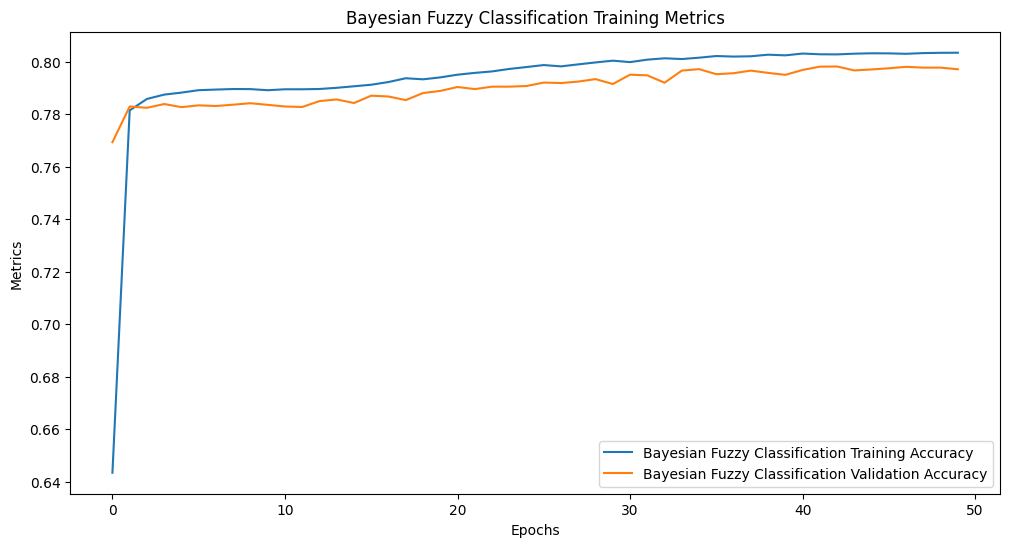

In [ ]:
# Grafik Garis Loss dan Akurasi untuk Model Bayesian Fuzzy Classification
plt.figure(figsize=(12, 6))
plt.plot(history_bayesian_fuzzy.history['accuracy'], label='Bayesian Fuzzy Classification Training Accuracy')
plt.plot(history_bayesian_fuzzy.history['val_accuracy'], label='Bayesian Fuzzy Classification Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Bayesian Fuzzy Classification Training Metrics')
plt.legend()
plt.show()